# Darknet to Polars dataset

Before start datasets transformations we need to install dvc by calling 

```pip install dvc```

In [ ]:
! pip install dvc

## Download Dataset

To download the dataset we are going to clone playingcards dataset from github.
This dataset is stored in darknet format and has two different partitions, `train` and `validate`

In [ ]:
! git clone https://github.com/DeepViewML/playingcards.git 

Once the repository is in our PC we need to invoke dvc to download dataset files from S3 bucket.
It could take few minutes based on you internet connection

In [ ]:
! cd playingcards && dvc pull

In [ ]:
# Count number of training images

! echo "Training Instances:"


! echo "   - images:" `ls -l playingcards/dataset/images/train | wc -l`
! echo "   - annotations:" `ls -l playingcards/dataset/labels/train | wc -l`

! echo "Validation Instances:"

! echo "   - images:" `ls -l playingcards/dataset/images/validate | wc -l`
! echo "   - annotations:" `ls -l playingcards/dataset/labels/validate | wc -l`

! echo "Quantization Samples:"

! echo "   - images:" `ls -l playingcards/dataset/images/quant | wc -l`


In [1]:
import sys
sys.path.insert(0, "../../python")
from deepview.nn.datasets.readers import DarknetDetectionReader
from deepview.nn.datasets.writers.polars import PolarsDetectionWriter

2024-02-01 14:39:11.523690: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-01 14:39:11.798625: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-01 14:39:12.474453: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# Reading Classes from dataset

import yaml
with open("/home/reinier/development/deepview-datasets/demos/python/coco/dataset.yaml", 'r') as fp:
    classes = yaml.safe_load(fp).get('classes')

print(classes)

# Defines the reader class that loads dataset images and annotations from 
# disk and return the iterator for safe reading

train_reader = DarknetDetectionReader(
    images="/home/reinier/development/deepview-datasets/demos/python/coco/images/train2017",
    annotations="/home/reinier/development/deepview-datasets/demos/python/coco/labels/train2017",
    classes=classes
)

val_reader = DarknetDetectionReader(
    images="/home/reinier/development/deepview-datasets/demos/python/coco/images/val2017",
    annotations="/home/reinier/development/deepview-datasets/demos/python/coco/labels/val2017",
    classes=classes
)

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


	 [INFO] Reading: 100%|███████████████| 5000/5000 [00:00<00:00, 339317.53it/s]


In [4]:
train_reader.classes

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'dining table',
 'toilet',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [5]:
# Defines the writer instance that loads the Darknet reader object and writes the instances
# to hard drive in arrow format
max_file_size = 8.0
train_writer = PolarsDetectionWriter(
    reader=train_reader,
    output="coco-polars/train-8gb",
    override=True,
    max_file_size=max_file_size # 2GB file chunk
)

val_writer = PolarsDetectionWriter(
    reader=val_reader,
    output="coco-polars/validate-8gb",
    override=True,
    max_file_size=max_file_size # 2GB file chunk
)

train_writer.export()
val_writer.export()


	 - [WARNING] Output directory is not empty. Exporter will override existing content: coco-polars/train-8gb
	 - [WARNING] Output directory is not empty. Exporter will override existing content: coco-polars/validate-8gb


	 [INFO] Writing:  48%|███████▏       | 56345/118287 [41:36<54:30, 18.94it/s]   /home/reinier/development/deepview-datasets/demos/python/../../python/deepview/nn/datasets/readers/darknet.py:292: UserWarning: genfromtxt: Empty input file: "/home/reinier/development/deepview-datasets/demos/python/coco/labels/train2017/000000000250.txt"
  boxes = np.genfromtxt(ann_file)
	 [INFO] Writing: 100%|███████████████| 5000/5000 [00:41<00:00, 121.71it/s]


In [7]:
# dataset is going to be saved into playingcards-polars folder

! tree -a coco-polars/train-8gb
! tree -a coco-polars/validate-8gb

coco-polars/train-8gb
├── boxes_000001.arrow
├── images_000001.arrow
├── images_000002.arrow
├── images_000003.arrow
├── images_000004.arrow
├── images_000005.arrow
├── images_000006.arrow
├── images_000007.arrow
├── images_000008.arrow
├── images_000009.arrow
├── images_000010.arrow
├── images_000011.arrow
├── images_000012.arrow
└── images_000013.arrow

0 directories, 14 files
coco-polars/validate-8gb
├── boxes_0001.arrow
└── images_0001.arrow

0 directories, 2 files


## Reading Dataset

To read the dataset we need to use the polars reader from example below.

In [2]:
import sys
sys.path.insert(0, "../../python")
from deepview.nn.datasets.readers import PolarsDetectionReader

2024-02-01 18:03:41.444479: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-01 18:03:41.470456: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-01 18:03:41.832362: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# load polars dataset

train_reader_polars = PolarsDetectionReader(
    inputs="/home/reinier/development/deepview-datasets/demos/python/coco-polars/train-8gb/images_*.arrow",
    annotations="/home/reinier/development/deepview-datasets/demos/python/coco-polars/train-8gb/boxes_*.arrow"
)

train_reader_polars.classes, len(train_reader_polars)

(['book',
  'clock',
  'bed',
  'toilet',
  'motorcycle',
  'person',
  'cow',
  'broccoli',
  'horse',
  'laptop',
  'tie',
  'bottle',
  'cup',
  'bird',
  'teddy bear',
  'donut',
  'elephant',
  'car',
  'zebra',
  'bus',
  'stop sign',
  'train',
  'handbag',
  'truck',
  'dog',
  'baseball bat',
  'potted plant',
  'chair',
  'vase',
  'dining table',
  'cell phone',
  'toothbrush',
  'tennis racket',
  'skis',
  'skateboard',
  'keyboard',
  'tv',
  'cake',
  'carrot',
  'bowl',
  'kite',
  'giraffe',
  'frisbee',
  'boat',
  'surfboard',
  'sandwich',
  'spoon',
  'umbrella',
  'oven',
  'microwave',
  'sink',
  'refrigerator',
  'knife',
  'fire hydrant',
  'fork',
  'bench',
  'sports ball',
  'baseball glove',
  'orange',
  'traffic light',
  'banana',
  'airplane',
  'mouse',
  'hot dog',
  'suitcase',
  'pizza',
  'scissors',
  'backpack',
  'wine glass',
  'bicycle',
  'remote',
  'sheep',
  'bear',
  'couch',
  'hair drier',
  'parking meter',
  'snowboard',
  'cat',
  '

In [4]:
# visualize samples.
# To visualize samples make sure opencv-python and matplotlib are installed.
import matplotlib.pyplot as plt
import numpy as np
import cv2
import polars as pl

colors = np.array([
    [180, 0, 0],
    [0, 166, 76],
    [178, 179, 0],
    [2, 1, 181],
    [127, 96, 166],
    [3, 152, 133],
    [121, 121, 121],
    [76, 0, 0],
    [240, 0, 0],
    [107, 123, 61],
    [245, 185, 0],
    [94, 78, 127],
    [202, 2, 202],
    [105, 153, 199],
    [252, 155, 209],
    [53, 76, 32],
    [146, 76, 17],
    [0, 219, 99],
    [142, 206, 70],
    [2, 71, 128]    
], np.uint8)

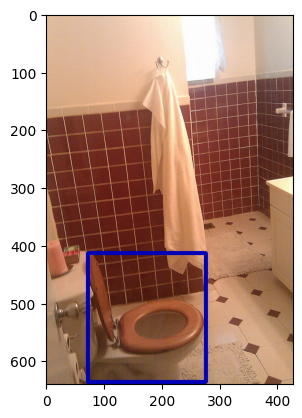

In [6]:
image, boxes = next(train_reader_polars)
H, W, _ = image.shape

for xc, yc, w, h, l in boxes:
    x1 = int((xc - w * 0.5) * W)
    x2 = int((xc + w * 0.5) * W)
    
    y1 = int((yc - h *0.5) * H)
    y2 = int((yc + h *0.5) * H)
    try:
        color = colors[int(l)].tolist()
    except:
        color = (0,0,0)
        
    cv2.rectangle(image, (x1, y1), (x2, y2), color, 5)

plt.imshow(image)


In [7]:
train_reader_polars.get_boxes_dimensions()


array([[0.127092, 0.075469],
       [0.085167, 0.049781],
       [0.716172, 0.743938],
       ...,
       [0.106   , 0.1168  ],
       [0.44494 , 0.633707],
       [0.07194 , 0.10744 ]], dtype=float32)